### Imports

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

#### Reading in the data

In [2]:
df = pd.read_csv('bitcoin.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2010-07-18,0.0,0.1,0.1,0.1,75,USD
1,2010-07-19,0.1,0.1,0.1,0.1,574,USD
2,2010-07-20,0.1,0.1,0.1,0.1,262,USD
3,2010-07-21,0.1,0.1,0.1,0.1,575,USD
4,2010-07-22,0.1,0.1,0.1,0.1,2160,USD


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,Currency
4415,2022-08-19,23201.6,23202.3,20807.8,20831.3,339472,USD
4416,2022-08-20,20830.7,21357.4,20784.8,21138.9,206943,USD
4417,2022-08-21,21138.9,21692.4,21077.4,21517.2,177522,USD
4418,2022-08-22,21516.8,21517.4,20912.1,21416.3,251833,USD
4419,2022-08-23,21416.5,21458.2,21271.2,21309.0,251695,USD


#### Data Preprocessing

In [5]:
df.isnull().any()

Date        False
Open        False
High        False
Low         False
Close       False
Volume      False
Currency    False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4420 entries, 0 to 4419
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4420 non-null   object 
 1   Open      4420 non-null   float64
 2   High      4420 non-null   float64
 3   Low       4420 non-null   float64
 4   Close     4420 non-null   float64
 5   Volume    4420 non-null   int64  
 6   Currency  4420 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 241.8+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Volume
count,4420.000000,4420.000000,4420.000000,4420.000000,4.420000e+03
mean,8302.221855,8531.971380,8043.473869,8306.969457,1.395788e+07
std,14598.398937,14992.605971,14146.499234,14599.046649,1.645973e+08
min,0.000000,0.100000,0.000000,0.100000,0.000000e+00
25%,122.500000,129.975000,118.300000,122.800000,3.013600e+04
50%,683.600000,706.500000,657.550000,685.000000,6.762050e+04
75%,8877.250000,9122.700000,8666.900000,8886.075000,1.769402e+05
max,67528.700000,68990.600000,66334.900000,67527.900000,4.468697e+09


In [9]:
# convert 'Date' column to datetime format

df['Date'] = pd.to_datetime(df['Date'])
#df['Date']= df['Date'].values.astype("float64")


In [10]:
df['Date']

0      2010-07-18
1      2010-07-19
2      2010-07-20
3      2010-07-21
4      2010-07-22
          ...    
4415   2022-08-19
4416   2022-08-20
4417   2022-08-21
4418   2022-08-22
4419   2022-08-23
Name: Date, Length: 4420, dtype: datetime64[ns]

###  Feature Engineering

In [15]:
# proposed target variable is the difference betwwen the 'open' and 'close' columns

df['Difference'] = df['Open'] - df['Close']


# Look at first 5 entries.
df['Difference'].head()

0   -0.1
1    0.0
2    0.0
3    0.0
4    0.0
Name: Difference, dtype: float64

In [16]:
df['Difference'].tail(10)

4410     139.3
4411     201.6
4412     245.8
4413     517.8
4414     134.1
4415    2370.3
4416    -308.2
4417    -378.3
4418     100.5
4419     107.5
Name: Difference, dtype: float64

In [17]:
df.corr()

,Open,High,Low,Close,Volume,Difference
Open,1.000000,0.999589,0.999221,0.998996,0.182761,0.021419
High,0.999589,1.000000,0.999158,0.999556,0.182589,-0.000251
Low,0.999221,0.999158,1.000000,0.999468,0.183437,-0.006492
Close,0.998996,0.999556,0.999468,1.000000,0.182242,-0.023398
Volume,0.182761,0.182589,0.183437,0.182242,1.000000,0.011404
Difference,0.021419,-0.000251,-0.006492,-0.023398,0.011404,1.000000


In [18]:
# create new features
# extract year and month and other time values from our time column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [19]:
df.head(10)

,Date,Open,High,Low,Close,Volume,Currency,Difference,Year,Month,Day
0,2010-07-18,0.0,0.1,0.1,0.1,75,USD,-0.1,2010,7,18
1,2010-07-19,0.1,0.1,0.1,0.1,574,USD,0.0,2010,7,19
2,2010-07-20,0.1,0.1,0.1,0.1,262,USD,0.0,2010,7,20
3,2010-07-21,0.1,0.1,0.1,0.1,575,USD,0.0,2010,7,21
4,2010-07-22,0.1,0.1,0.1,0.1,2160,USD,0.0,2010,7,22
5,2010-07-23,0.1,0.1,0.1,0.1,2403,USD,0.0,2010,7,23
6,2010-07-24,0.1,0.1,0.1,0.1,496,USD,0.0,2010,7,24
7,2010-07-25,0.1,0.1,0.1,0.1,1551,USD,0.0,2010,7,25
8,2010-07-26,0.1,0.1,0.1,0.1,877,USD,0.0,2010,7,26
9,2010-07-27,0.1,0.1,0.1,0.1,3374,USD,0.0,2010,7,27


In [20]:
# 'Currency' column is dropped because it does not add any information to the dataset.

df= df.drop('Currency', axis=1)


###  Data Visualization

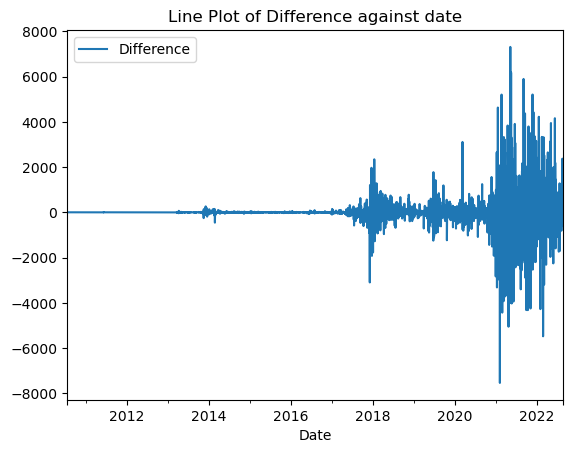

In [21]:
df.plot.line(x="Date", y="Difference", title="Line Plot of Difference against date")

plt.show()

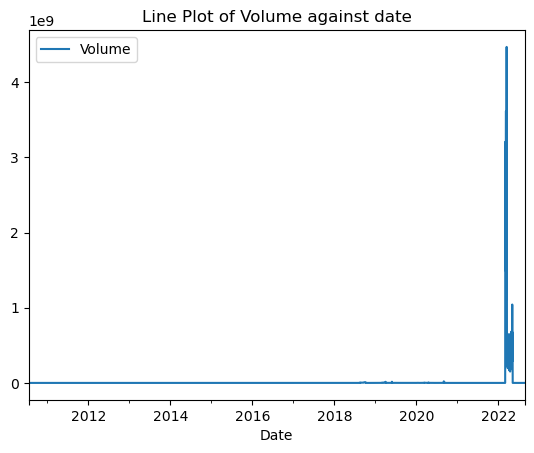

In [22]:
df.plot.line(x="Date", y="Volume", title="Line Plot of Volume against date")

plt.show()

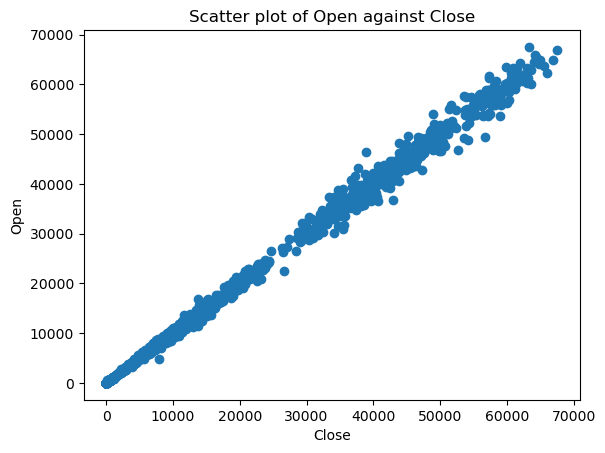

In [23]:
plt.scatter(df['Open'], df['Close'])
plt.ylabel("Open")
plt.xlabel("Close")
plt.title('Scatter plot of Open against Close')
plt.show()

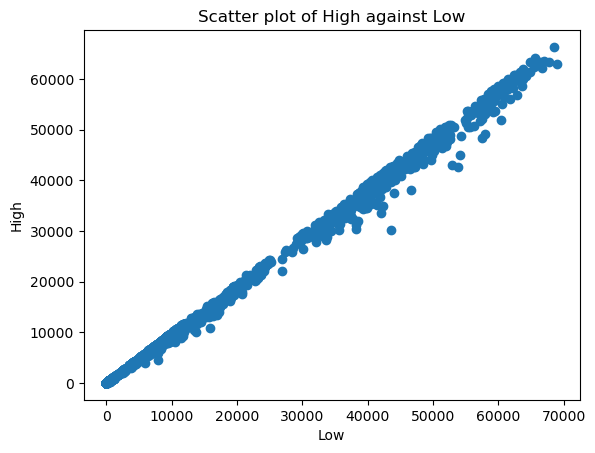

In [24]:
plt.scatter(df['High'], df['Low'])
plt.ylabel("High")
plt.xlabel("Low")
plt.title('Scatter plot of High against Low')
plt.show()

In [25]:
df = df.drop('Date', axis = 1)

#### Train test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
y = df['Difference']
X = df.drop('Difference', axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X Train shape: {X_train.shape}')
print(f'X Test shape: {X_test.shape}')
print(f'y Train shape: {y_train.shape}')
print(f'y Test shape: {y_test.shape}')

X Train shape: (3536, 8)
X Test shape: (884, 8)
y Train shape: (3536,)
y Test shape: (884,)


#### Implementing Scaling



In [29]:
from sklearn.preprocessing import StandardScaler

# create scaler object
scaler = StandardScaler()

# fit and transform the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create a new dataframe with the scaled data
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# view our scaled data
X_train.head()

,Open,High,Low,Close,Volume,Year,Month,Day
0,-0.569735,-0.570530,-0.570063,-0.570814,-0.091304,-1.748421,0.455418,-0.319093
1,2.404166,2.338152,2.426062,2.402094,-0.091047,1.396683,0.745311,1.045666
2,0.011139,-0.002351,0.010999,0.002140,-0.088561,0.824846,1.035204,-1.456393
3,-0.569673,-0.570469,-0.569998,-0.570751,-0.091301,-1.462502,-1.283941,0.135826
4,-0.569457,-0.570259,-0.569797,-0.570549,-0.091079,-1.462502,1.035204,-0.546553


### Fitting and evaluating the model

#### Random Forest

We first create an instance of the Random Forest model, with the default parameters. We then fit this to our training data. We pass both the features and the target variable, so the model can learn.

In [30]:
# Import the random forest module
from sklearn.ensemble import RandomForestRegressor

In [31]:
# Declare the model object
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [33]:
rf_pred = rf.predict(X_test)

In [78]:
rf_rmse = round(np.sqrt(mean_squared_error(y_test,rf_pred)),3)
rf_mse = round(mean_squared_error(y_test,rf_pred),3)
rf_mae = round(mean_absolute_error(y_test,rf_pred),3)
rf_r2 = round(r2_score(y_test,rf_pred),3)

In [79]:
print("RMSE:",rf_rmse)
print("MSE:",rf_mse)
print("MAE:",rf_mae)
print("R2 Score",rf_r2)


RMSE: 546.467
MSE: 298625.72
MAE: 211.969
R2 Score 0.255


Plot predicted output vs expected output.

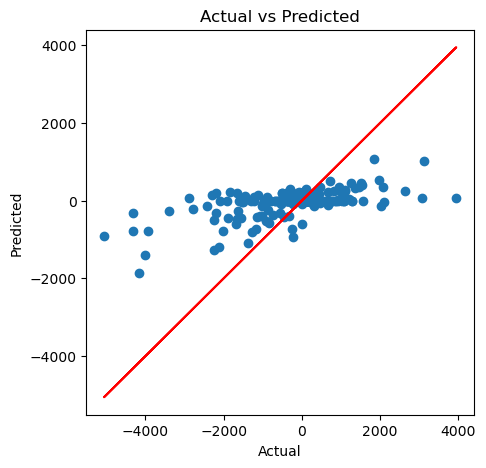

In [27]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,rf_pred)
ax.plot(y_test,y_test,'r')
plt.show()

#### Support Vector Regressor 

In [36]:
from sklearn.svm import SVR


In [37]:
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [38]:
svm_pred = svm.predict(X_test)

In [76]:
svm_rmse = round(np.sqrt(mean_squared_error(y_test,svm_pred)),3)
svm_mse = round(mean_squared_error(y_test,svm_pred),3)
svm_mae = round(mean_absolute_error(y_test,svm_pred),3)
svm_r2 = round(r2_score(y_test,svm_pred),3)

In [77]:
print("RMSE:",svm_rmse)
print("MSE:",svm_mse)
print("MAE:",svm_mae)
print("R2 Score",svm_r2)

RMSE: 636.123
MSE: 404652.606
MAE: 237.131
R2 Score -0.01


#### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dtr = DecisionTreeRegressor()

In [43]:
# fit model and make prediction
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

In [74]:
dtr_rmse = round(np.sqrt(mean_squared_error(y_test,dtr_pred)),3)
dtr_mse = round(mean_squared_error(y_test,dtr_pred),3)
dtr_mae = round(mean_absolute_error(y_test,dtr_pred),3)
dtr_r2 = round(r2_score(y_test,dtr_pred),3)

In [75]:
print("RMSE:",dtr_rmse)
print("MSE:",dtr_mse)
print("MAE:",dtr_mae)
print("R2 Score",dtr_r2)

RMSE: 426.233
MSE: 181674.246
MAE: 158.76
R2 Score 0.547


#### Gradient Boost Model

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
gbr = GradientBoostingRegressor(n_estimators=100)

In [48]:
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

In [72]:
gbr_rmse = round(np.sqrt(mean_squared_error(y_test,gbr_pred)),3)
gbr_mse = round(mean_squared_error(y_test,gbr_pred),3)
gbr_mae = round(mean_absolute_error(y_test,gbr_pred),3)
gbr_r2 = round(r2_score(y_test,gbr_pred),3)

In [73]:
print("RMSE:",gbr_rmse)
print("MSE:",gbr_mse)
print("MAE:",gbr_mae)
print("R2 Score",gbr_r2)

RMSE: 432.18
MSE: 186779.71
MAE: 174.679
R2 Score 0.534


#### Linear Regressor

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [70]:
lr_rmse = round(np.sqrt(mean_squared_error(y_test,lr_pred)),3)
lr_mse = round(mean_squared_error(y_test,lr_pred),3)
lr_mae = round(mean_absolute_error(y_test,lr_pred),3)
lr_r2 = round(r2_score(y_test,lr_pred),3)

In [71]:
print("RMSE:",lr_rmse)
print("MSE:",lr_mse)
print("MAE:",lr_mae)
print("R2 Score",lr_r2)

RMSE: 0.0
MSE: 0.0
MAE: 0.0
R2 Score 1.0


### Comparing the two best performing models

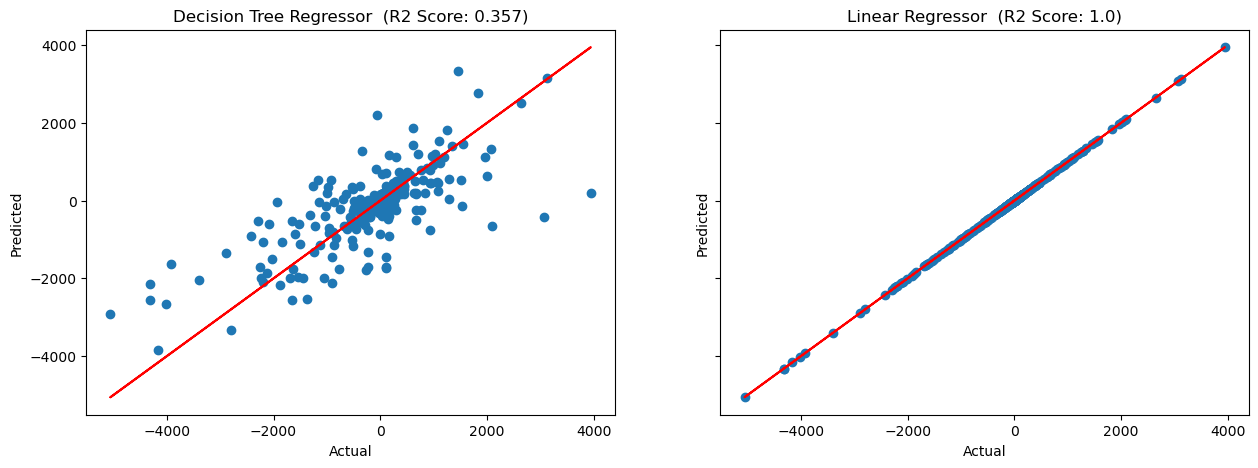

In [57]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [dtr_pred, lr_pred]
title = ['Decision Tree Regressor','Linear Regressor']

# Loop through all axes to plot each model's results 
for i in range(2):
    r2 = round(r2_score(pred[i],y_test),3)
    #rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (R2 Score: "+str(r2)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

In [58]:
y_test.head(10)

1042      1.1
1272    -20.8
1918      7.9
1896      0.7
4204    967.7
3247     83.9
691       0.0
3438    225.0
2238     -3.3
1822      3.4
Name: Difference, dtype: float64

In [59]:
lr_pred[:10]

array([ 1.10000000e+00, -2.08000000e+01,  7.90000000e+00,  7.00000000e-01,
        9.67700000e+02,  8.39000000e+01,  8.03090927e-12,  2.25000000e+02,
       -3.30000000e+00,  3.40000000e+00])

### Attempting To Improve Predictions By Ensemble Methods

Ensemble methods are techniques aimed at improving model accuracy, by combining multiple models instead of using a single model

In [60]:
from sklearn.ensemble import AdaBoostRegressor

In [61]:
# try ensemble learning with ada boost
base_estimator = GradientBoostingRegressor()
n_estimators = 250
adaboost_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=n_estimators, loss='exponential')

In [62]:
# fit our model
adaboost_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=GradientBoostingRegressor(),
                  loss='exponential', n_estimators=250)

In [63]:
ada_pred = adaboost_model.predict(X_test)

In [68]:
ada_rmse = round(np.sqrt(mean_squared_error(y_test,ada_pred)),3)
ada_mse = round(mean_squared_error(y_test,ada_pred),3)
ada_mae = round(mean_absolute_error(y_test,ada_pred),3)
ada_r2 = round(r2_score(y_test,ada_pred),3)

In [69]:
print("RMSE:",ada_rmse)
print("MSE:",ada_mse)
print("MAE:",ada_mae)
print("R2 Score",ada_r2)

RMSE: 410.613
MSE: 168602.665
MAE: 235.392
R2 Score 0.579


### Model Performance




We will be comparing model performance based on the following metrics:
* R-squared score
* Root Mean Squared Error
* Mean Absolute Error

In [80]:
model_performance1 = {
                    'R2 Score':
                    {
                        'Linear Regression': lr_r2,
                        'Decision Tree': dtr_r2,
                        'Support Vector': svm_r2,
                        'Random Forest': rf_r2,
                        'GradientBoostingRegressor': gbr_r2,
                        'AdaBoost': ada_r2
                    }
}
# create dataframe from dictionary
model_performance1 = pd.DataFrame(model_performance1)
model_performance1.sort_values(by='R2 Score',ascending=False)

,R2 Score
Linear Regression,1.000
AdaBoost,0.579
Decision Tree,0.547
GradientBoostingRegressor,0.534
Random Forest,0.255
Support Vector,-0.010


In [81]:
model_performance2 = {
                    'Root Mean Squared Error':
                    {
                        'Linear Regression': lr_rmse,
                        'Decision Tree': dtr_rmse,
                        'Support Vector': svm_rmse,
                        'Random Forest': rf_rmse,
                        'GradientBoostingRegressor': gbr_rmse,
                        'AdaBoost': ada_rmse
                    }
}
# create dataframe from dictionary
model_performance2 = pd.DataFrame(model_performance2)
model_performance2.sort_values(by='Root Mean Squared Error',ascending=True)

,Root Mean Squared Error
Linear Regression,0.000
AdaBoost,410.613
Decision Tree,426.233
GradientBoostingRegressor,432.180
Random Forest,546.467
Support Vector,636.123


In [82]:
model_performance3 = {
                    'Mean Absolute Error':
                    {
                        'Linear Regression': lr_mae,
                        'Decision Tree': dtr_mae,
                        'Support Vector': svm_mae,
                        'Random Forest': rf_mae,
                        'GradientBoostingRegressor': gbr_mae,
                        'AdaBoost': ada_mae
                    }
}
# create dataframe from dictionary
model_performance3 = pd.DataFrame(model_performance3)
model_performance3.sort_values(by='Mean Absolute Error',ascending=True)

,Mean Absolute Error
Linear Regression,0.000
Decision Tree,158.760
GradientBoostingRegressor,174.679
Random Forest,211.969
AdaBoost,235.392
Support Vector,237.131


## Save Best Performing Model as a Pickle File

In [83]:
import pickle

# store our Linear Regression model in a variable
model = lr

# Specify the file path where you want to save the model
file_path = "model.pkl"

# Save the model as a pickle file
with open(file_path, 'wb') as f:
    pickle.dump(model, f)